In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)
#coisas para fazer o KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#coisas para testar
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# separando em treino e teste

x=df.iloc[:,0:12]
y=df.iloc[:,12]

x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,random_state=0,test_size=0.2)

In [4]:
#fazendo tudo em escala 
scaler = StandardScaler().fit(x_treino)
x_treino=scaler.transform(x_treino)
x_teste=scaler.transform(x_teste)

In [5]:
#treinando a máquina
classificador=KNeighborsClassifier(n_neighbors=13,p=2,metric='minkowski')
classificador.fit(x_treino,y_treino)

#testando o modelo
y_pred=classificador.predict(x_teste)
print(f1_score(y_teste,y_pred))
print(accuracy_score(y_teste,y_pred))

0.5625
0.7666666666666667


Text(0.5, 1.0, '"Confusion Matrix"')

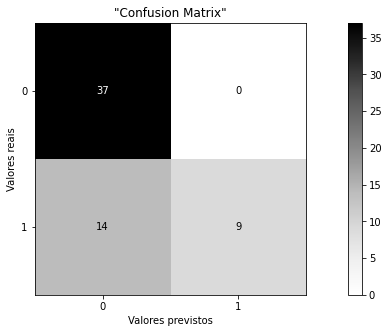

In [6]:
plot_confusion_matrix(classificador,x_teste,y_teste,normalize=None,cmap='Greys',values_format='.2g')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('"Confusion Matrix"')

O KNN não dá falso positivos mas dá muitos falsos negativos. Ou seja, se der que vai morrer pode ter certeza que vai morrer. Se der que não vai morrer, dá pra ter certeza não...

In [7]:
def prever(arr):
    arr=scaler.transform([arr])
    resultado=classificador.predict(arr)[0]
    if resultado==0:
        print('Tá okay.')
    else:
        print('Vai morrer ein')

In [8]:
prever([70,1,125,0,25,1,237000,1,140,1,0,15])

Tá okay.


In [9]:
valor=[]
for i in range(1,201,2):
    classificador=KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    classificador.fit(x_treino,y_treino)
    y_pred=classificador.predict(x_teste)
    f1=f1_score(y_teste,y_pred)
    valor.append([f1,i])

In [10]:
max(valor)

[0.5625, 13]